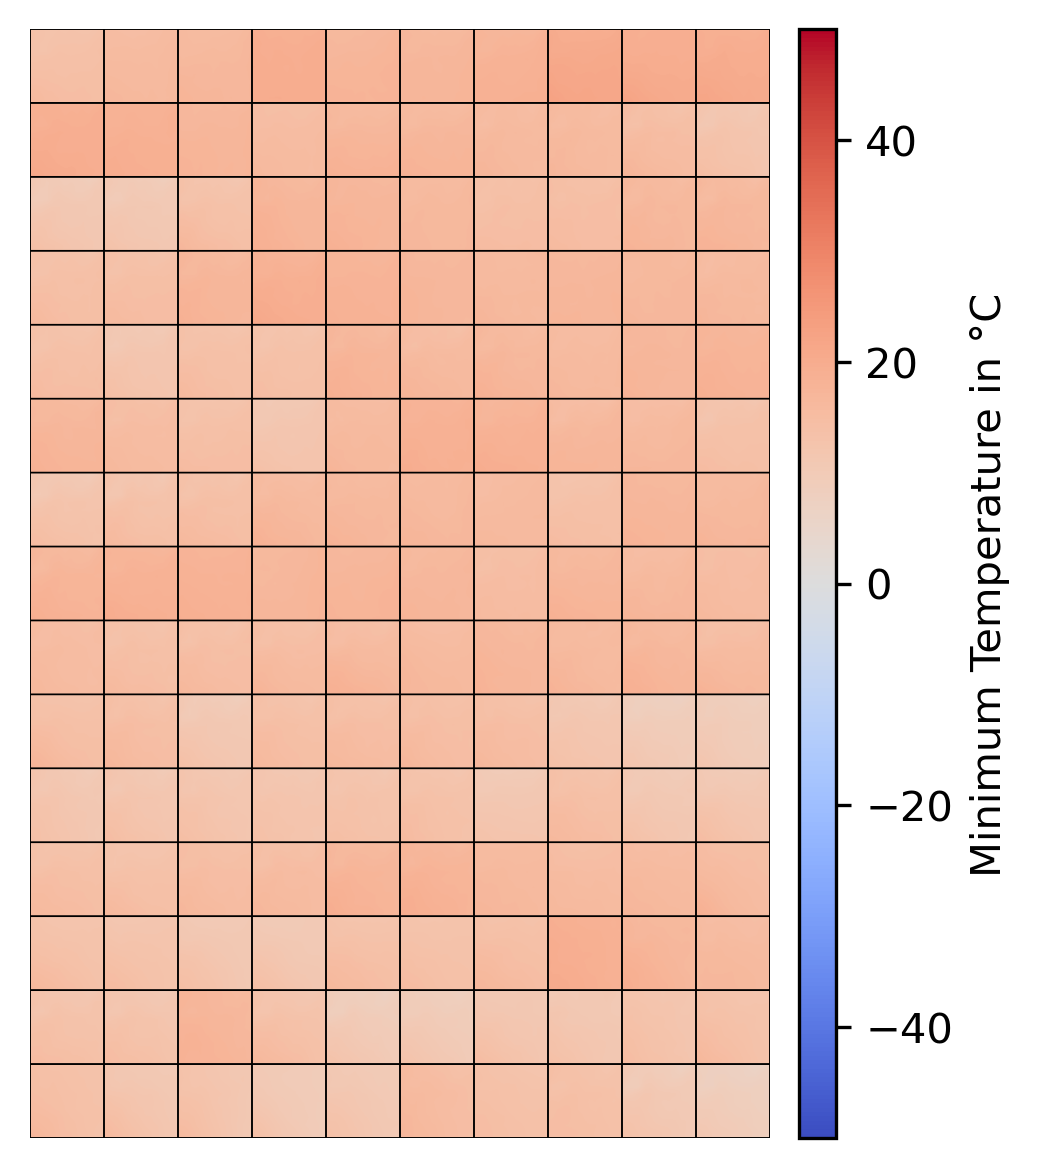

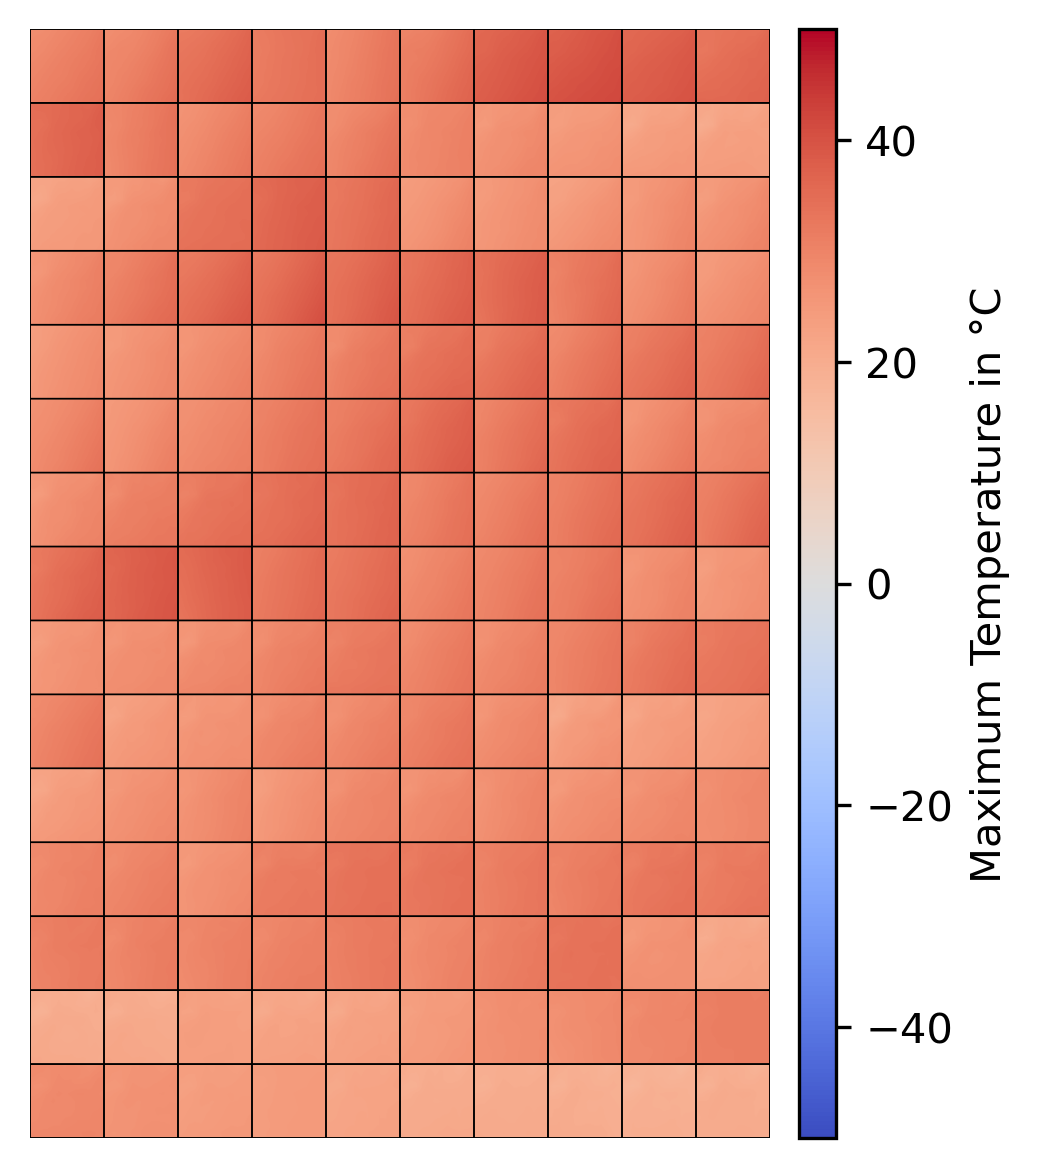

In [1]:
%matplotlib inline
import earthnet as en
import matplotlib.pyplot as plt
import numpy as np

cubePath = '/home/nikoskot/EarthnetDataset/train/29SND/29SND_2017-06-10_2017-11-06_2105_2233_2873_3001_32_112_44_124.npz'

cubeData = np.load(cubePath)

fig = en.cube_gallery(cubePath, variable='tn')

fig = en.cube_gallery(cubePath, variable='tx')

In [8]:
# Check the specific minicube that I loaded
print(type(cubeData))

print(list(cubeData.keys()))

print(type(cubeData['highresdynamic']))

print("\nShapes")
for k in list(cubeData.keys()):
    print('{} : {}'.format(k, cubeData[k].shape))


<class 'numpy.lib.npyio.NpzFile'>
['highresdynamic', 'highresstatic', 'mesodynamic', 'mesostatic']
<class 'numpy.ndarray'>

Shapes
highresdynamic : (128, 128, 7, 30)
highresstatic : (128, 128, 1)
mesodynamic : (80, 80, 5, 150)
mesostatic : (80, 80, 1)


In [32]:
from pathlib import Path
from tqdm import tqdm

# Find the different sizes of the data categories and if they contain Nan values

# Get a list of all the available minicubes in the train folder

dataDir = Path('/home/nikoskot/EarthnetDataset/train')

# Get the number of folders in the train folder
folders = list(dataDir.iterdir())
print("Number of folders in train folder: {}".format(len(folders)))

# Get the number of .npz files in the train folder
dataFiles = list(dataDir.glob("**/*.npz"))
print("Number of .npz files in train folder {}".format(len(dataFiles)))

# The different shapes of each category in the files
highresdynamicShapes = set()
highresstaticShapes = set()
mesodynamicShapes = set()
mesostaticShapes = set()

highresdynamicHasNan = False
highresstaticHasNan = False
mesodynamicHasNan = False
mesostaticHasNan = False

for file in tqdm(dataFiles):

    minicube = np.load(file)

    hd = minicube['highresdynamic']
    hs = minicube['highresstatic']
    md = minicube['mesodynamic']
    ms = minicube['mesostatic']

    highresdynamicShapes.add(hd.shape)
    highresstaticShapes.add(hs.shape)
    mesodynamicShapes.add(md.shape)
    mesostaticShapes.add(ms.shape)

    # Check for Nan's
    if np.isnan(hd).any():
        highresdynamicHasNan = True
    if np.isnan(hs).any():
        highresstaticHasNan = True
    if np.isnan(md).any():
        mesodynamicHasNan = True
    if np.isnan(ms).any():
        mesostaticHasNan = True

print("\n Highresdynamic different shapes: {}".format(highresdynamicShapes))
print("\n Highresdynamic has Nan's: {}".format(highresdynamicHasNan))
print("\n Highresstatic different shapes: {}".format(highresstaticShapes))
print("\n Highresstatic has Nan's: {}".format(highresstaticHasNan))
print("\n Mesodynamic different shapes: {}".format(mesodynamicShapes))
print("\n Mesodynamic has Nan's: {}".format(mesodynamicHasNan))
print("\n Mesostatic different shapes: {}".format(mesostaticShapes))
print("\n Mesostatic has Nan's: {}".format(mesostaticHasNan))

Number of folders in train folder: 86
Number of .npz files in train folder 23904


100%|██████████| 23904/23904 [39:21<00:00, 10.12it/s]  


 Highresdynamic different shapes: {(128, 128, 7, 30)}

 Highresdynamic has Nan's: True

 Highresstatic different shapes: {(128, 128, 1)}

 Highresstatic has Nan's: False

 Mesodynamic different shapes: {(80, 80, 5, 150)}

 Mesodynamic has Nan's: False

 Mesostatic different shapes: {(80, 80, 1)}

 Mesostatic has Nan's: False


In [34]:
from pathlib import Path
from tqdm import tqdm

# Find the number of NaN values in the highresdynamic variables

# Get a list of all the available minicubes in the train folder

dataDir = Path('/home/nikoskot/EarthnetDataset/train')
dataFiles = list(dataDir.glob("**/*.npz"))

hdVariablesNans = {'b':0, 'g':0, 'r':0, 'nif':0, 'cld':0, 'sc':0, 'cldmask':0}
keysList = list(hdVariablesNans.keys())

for file in tqdm(dataFiles):

    minicube = np.load(file)

    hd = minicube['highresdynamic']

    for i in range(7):

        hdVariablesNans[keysList[i]] += np.isnan(hd[:,:,i,:]).sum()

print(hdVariablesNans)

print("Total values in each variable {}.".format(128*128*30))





100%|██████████| 23904/23904 [17:09<00:00, 23.21it/s]  

{'b': 208584704, 'g': 208584704, 'r': 208584704, 'nif': 208584704, 'cld': 208584704, 'sc': 208584704, 'cldmask': 0}
Total values in each variable 491520.


In [45]:
# Get the max and min values of the data

from pathlib import Path
from tqdm import tqdm

dataDir = Path('/home/nikoskot/EarthnetDataset/train')
dataFiles = list(dataDir.glob("**/*.npz"))

bChannelRange = gChannelRange = rChannelRange = nifChannelRange = cldRange = scRange = cldmaskRange = hsRange = rainfallRange = pressureRange = meanTmpRange = minTmpRange = maxTmpRange = msRange = [1000000.0, -10000000.0]

for file in tqdm(dataFiles):

    minicube = np.load(file)

    hd          = minicube['highresdynamic']
    bChannel    = hd[:,:,0,:]
    gChannel    = hd[:,:,1,:]
    rChannel    = hd[:,:,2,:]
    nifChannel  = hd[:,:,3,:]
    cld         = hd[:,:,4,:]
    sc          = hd[:,:,5,:]
    cldmask     = hd[:,:,6,:]
    hs          = minicube['highresstatic']
    md          = minicube['mesodynamic']
    rainfall    = md[:,:,0,:]
    pressure    = md[:,:,1,:]
    meanTmp     = md[:,:,2,:]
    minTmp      = md[:,:,3,:]
    maxTmp      = md[:,:,4,:]
    ms          = minicube['mesostatic']

    bChannelRange   = [min(bChannelRange[0], np.min(bChannel)),      max(bChannelRange[1], np.max(bChannel))]
    gChannelRange   = [min(gChannelRange[0], np.min(gChannel)),      max(gChannelRange[1], np.max(gChannel))]
    rChannelRange   = [min(rChannelRange[0], np.min(rChannel)),      max(rChannelRange[1], np.max(rChannel))]
    nifChannelRange = [min(nifChannelRange[0], np.min(nifChannel)),  max(nifChannelRange[1], np.max(nifChannel))]
    cldRange        = [min(cldRange[0], np.min(cld)),                max(cldRange[1], np.max(cld))]
    scRange         = [min(scRange[0], np.min(sc)),                  max(scRange[1], np.max(sc))]
    cldmaskRange    = [min(cldmaskRange[0], np.min(cldmask)),        max(cldmaskRange[1], np.max(cldmask))]
    hsRange         = [min(hsRange[0], np.min(hs)),                  max(hsRange[1], np.max(hs))]
    rainfallRange   = [min(rainfallRange[0], np.min(rainfall)),      max(rainfallRange[1], np.max(rainfall))]
    pressureRange   = [min(pressureRange[0], np.min(pressure)),      max(pressureRange[1], np.max(pressure))]
    meanTmpRange    = [min(meanTmpRange[0], np.min(meanTmp)),        max(meanTmpRange[1], np.max(meanTmp))]
    minTmpRange     = [min(minTmpRange[0], np.min(minTmp)),          max(minTmpRange[1], np.max(minTmp))]
    maxTmpRange     = [min(maxTmpRange[0], np.min(maxTmp)),          max(maxTmpRange[1], np.max(maxTmp))]
    msRange         = [min(msRange[0], np.min(ms)),                  max(msRange[1], np.max(ms))]



print("Blue channel min {} - max {}"    .format(bChannelRange[0],   bChannelRange[1]))
print("Green channel min {} - max {}"   .format(gChannelRange[0],   gChannelRange[1]))
print("Red channel min {} - max {}"     .format(rChannelRange[0],   rChannelRange[1]))
print("Nif channel min {} - max {}"     .format(nifChannelRange[0], nifChannelRange[1]))
print("Cloud percentage min {} - max {}".format(cldRange[0],        cldRange[1]))
print("Scene classif min {} - max {}"   .format(scRange[0],         scRange[1]))
print("Cloud mask min {} - max {}"      .format(cldmaskRange[0],    cldmaskRange[1]))
print("Highresstatics min {} - max {}"  .format(hsRange[0],         hsRange[1]))
print("Rainfall min {} - max {}"        .format(rainfallRange[0],   rainfallRange[1]))
print("Pressure min {} - max {}"        .format(pressureRange[0],   pressureRange[1]))
print("Mean temperature min {} - max {}".format(meanTmpRange[0],    meanTmpRange[1]))
print("Min temperature min {} - max {}" .format(minTmpRange[0],     minTmpRange[1]))
print("Max temperature min {} - max {}" .format(maxTmpRange[0],     maxTmpRange[1]))
print("Mesostatic min {} - max {}"      .format(msRange[0],         msRange[1]))


100%|██████████| 23904/23904 [48:23<00:00,  8.23it/s]  

Blue channel min -0.2138671875 - max 2.291015625
Green channel min -0.204833984375 - max 2.181640625
Red channel min -0.197998046875 - max 2.0078125
Nif channel min -0.184814453125 - max 1.8720703125
Cloud percentage min 0.0 - max 100.0
Scene classif min 0.0 - max 11.0
Cloud mask min 0.0 - max 1.0
Highresstatics min 0.49169921875 - max 1.1630859375
Rainfall min 0.0 - max 3.85546875
Pressure min -4.5 - max 0.7841796875
Mean temperature min 0.1387939453125 - max 0.84765625
Min temperature min 0.213623046875 - max 0.8017578125
Max temperature min 0.32666015625 - max 0.96142578125
Mesostatic min 0.462890625 - max 1.421875


100%|██████████| 23904/23904 [35:31<00:00, 11.22it/s]


Text(0.5, 1.0, 'Target Mask')

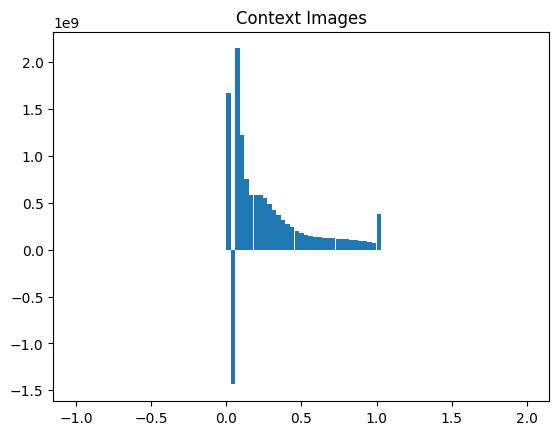

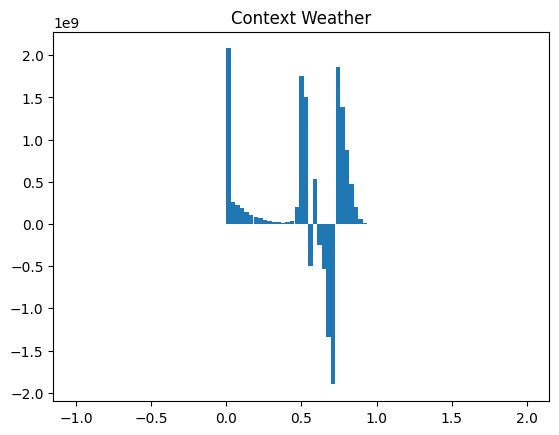

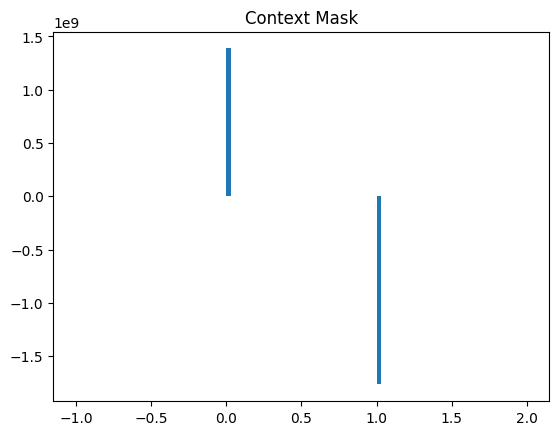

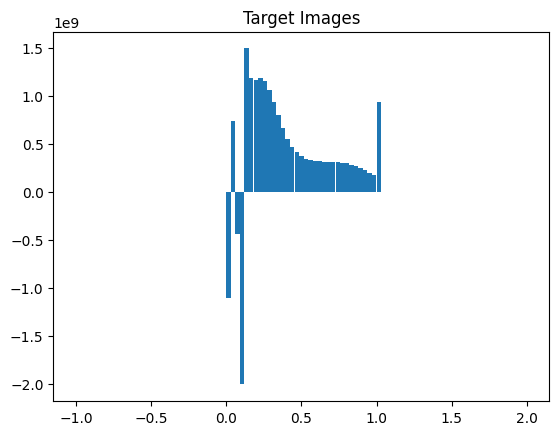

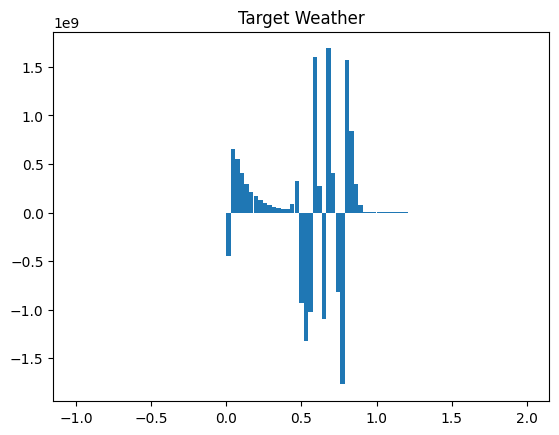

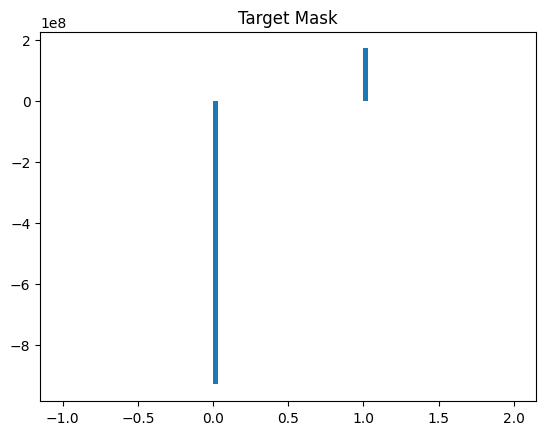

In [26]:
# Plot histograms of UNPROCESSED context and target images, weather data and masks
from swinUnet.earthnetDataloader import EarthnetTrainDataset, Preprocessing
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import tqdm

dataset = EarthnetTrainDataset(dataDir='/home/nikoskot/earthnetThesis/EarthnetDataset/train', dtype=np.float32, transform=None)

dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=2, pin_memory=True)

bins = np.linspace(-1.0, 2.0, 100)
contextImageHist = np.zeros(99, dtype='int64')
contextWeatherHist = np.zeros(99, dtype='int64')
contextMaskHist = np.zeros(99, dtype='int64')
targetImageHist = np.zeros(99, dtype='int64')
targetWeatherHist = np.zeros(99, dtype='int64')
targetMaskHist = np.zeros(99, dtype='int64')

for data in tqdm.tqdm(dataloader):

    currentHist, _ = np.histogram(data['context']['images'].numpy(), bins)
    contextImageHist += currentHist

    currentHist, _ = np.histogram(data['context']['weather'], bins)
    contextWeatherHist += currentHist

    currentHist, _ = np.histogram(data['context']['mask'], bins)
    contextMaskHist += currentHist

    currentHist, _ = np.histogram(data['target']['images'], bins)
    targetImageHist += currentHist

    currentHist, _ = np.histogram(data['target']['weather'], bins)
    targetWeatherHist += currentHist

    currentHist, _ = np.histogram(data['target']['mask'], bins)
    targetMaskHist += currentHist

    
plt.figure()
plt.bar(x=bins[:-1], height=contextImageHist, align='edge', width=0.03)
plt.title('Context Images')

plt.figure()
plt.bar(x=bins[:-1], height=contextWeatherHist, align='edge', width=0.03)
plt.title('Context Weather')

plt.figure()
plt.bar(x=bins[:-1], height=contextMaskHist, align='edge', width=0.03)
plt.title('Context Mask')

plt.figure()
plt.bar(x=bins[:-1], height=targetImageHist, align='edge', width=0.03)
plt.title('Target Images')

plt.figure()
plt.bar(x=bins[:-1], height=targetWeatherHist, align='edge', width=0.03)
plt.title('Target Weather')

plt.figure()
plt.bar(x=bins[:-1], height=targetMaskHist, align='edge', width=0.03)
plt.title('Target Mask')


  0%|          | 0/2988 [00:00<?, ?it/s]

100%|██████████| 2988/2988 [43:03<00:00,  1.16it/s]


Input mean per channel: [0.18194012 0.19730986 0.19899204 0.36337873 0.02681853 0.2736224
 0.65116493 0.59689118 0.70860106 0.57909068 0.58907776]
Input std per channel: [0.27229501 0.25477614 0.25042932 0.20255798 0.03079655 1.2200778
 0.06694908 0.05617107 0.07998532 0.06982114 0.08784206]
Ground truth mean per channel: [0.21757597 0.23005872 0.23183691 0.37306271]
Ground truth std per channel: [0.29655878 0.27806864 0.27187153 0.21533101]
Input mean per channel: [0.57038153]
Input std per channel: [0.49502166]


Text(0.5, 1.0, 'Target Mask')

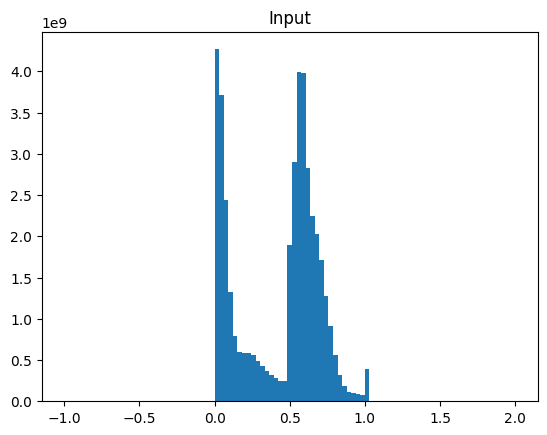

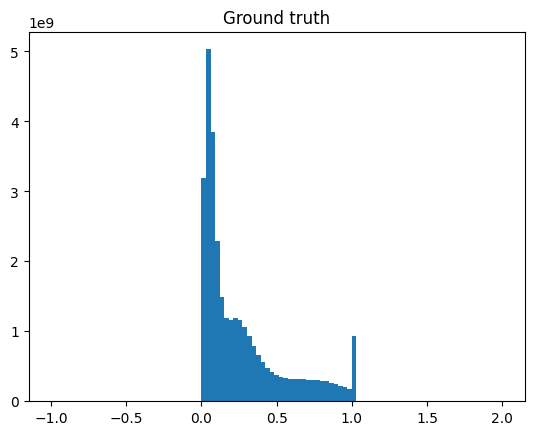

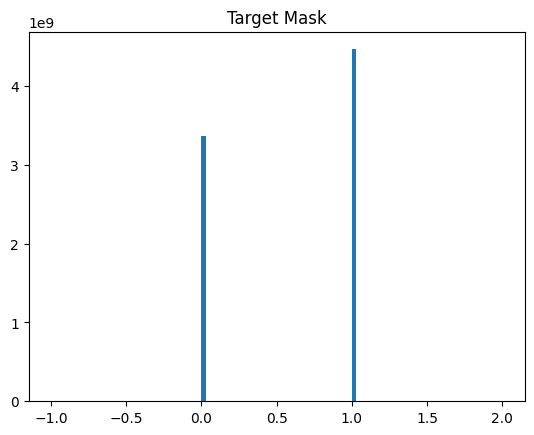

In [4]:
# Calculate the mean and std of PREPROCESSED ground truth images.
from swinUnet.earthnetDataloader import EarthnetTrainDataset, Preprocessing
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import tqdm

BATCH_SIZE = 8
NUM_INPUT_CHANNELS = 11
NUM_OUTPUT_CHANNELS = 4
INPUT_TIME = 10
OUTPUT_TIME = 20
IMG_HW = 128

dataset = EarthnetTrainDataset(dataDir='/home/nikoskot/earthnetThesis/EarthnetDataset/train', dtype=np.float32, transform=Preprocessing())

dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

bins = np.linspace(-1.0, 2.0, 100)
inputHist = np.zeros(99, dtype='int64')
inputSum = np.zeros(NUM_INPUT_CHANNELS)
inputSquaredSum = np.zeros(NUM_INPUT_CHANNELS)
inputCounter = 0
groundTruthHist = np.zeros(99, dtype='int64')
groundTruthSum = np.zeros(NUM_OUTPUT_CHANNELS)
groundTruthSquaredSum = np.zeros(NUM_OUTPUT_CHANNELS)
groundTruthCounter = 0
targetMaskHist = np.zeros(99, dtype='int64')
targetMaskSum = 0
targetMaskSquaredSum = 0
targetMaskCounter = 0

for data in tqdm.tqdm(dataloader):

    d = data['x'].numpy().reshape(BATCH_SIZE, NUM_INPUT_CHANNELS, INPUT_TIME*IMG_HW*IMG_HW)
    currentHist, _ = np.histogram(d, bins)
    inputHist += currentHist
    inputSum += d.sum(axis=(0, 2))
    inputSquaredSum += np.square(d).sum(axis=(0, 2))
    inputCounter += d.shape[0] * d.shape[2]

    d = data['y'].numpy().reshape(BATCH_SIZE, NUM_OUTPUT_CHANNELS, OUTPUT_TIME*IMG_HW*IMG_HW)
    currentHist, _ = np.histogram(d, bins)
    groundTruthHist += currentHist
    groundTruthSum += d.sum(axis=(0, 2))
    groundTruthSquaredSum += np.square(d).sum(axis=(0, 2))
    groundTruthCounter += d.shape[0] * d.shape[2]

    d = data['targetMask'].numpy().reshape(BATCH_SIZE, 1, OUTPUT_TIME*IMG_HW*IMG_HW)
    currentHist, _ = np.histogram(d, bins)
    targetMaskHist += currentHist
    targetMaskSum += d.sum(axis=(0, 2))
    targetMaskSquaredSum += np.square(d).sum(axis=(0, 2))
    targetMaskCounter += d.shape[0] * d.shape[2]

print('Input mean per channel: {}'.format(inputSum / inputCounter))
print('Input std per channel: {}'.format(np.sqrt((inputSquaredSum / inputCounter) - (inputSum / inputCounter)**2)))

print('Ground truth mean per channel: {}'.format(groundTruthSum / groundTruthCounter))
print('Ground truth std per channel: {}'.format(np.sqrt((groundTruthSquaredSum / groundTruthCounter) - (groundTruthSum / groundTruthCounter)**2)))

print('Input mean per channel: {}'.format(targetMaskSum / targetMaskCounter))
print('Input std per channel: {}'.format(np.sqrt((targetMaskSquaredSum / targetMaskCounter) - (targetMaskSum / targetMaskCounter)**2)))

plt.figure()
plt.bar(x=bins[:-1], height=inputHist, align='edge', width=0.03)
plt.title('Input')

plt.figure()
plt.bar(x=bins[:-1], height=groundTruthHist, align='edge', width=0.03)
plt.title('Ground truth')

plt.figure()
plt.bar(x=bins[:-1], height=targetMaskHist, align='edge', width=0.03)
plt.title('Target Mask')